In [2]:
import numpy as np
import pandas as pd
import geopandas as gpd
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
from scipy.ndimage import gaussian_filter

In [3]:
# Correct path based 
admin_regions = gpd.read_file("nepal_climate_data/nepal_admin_regions.gpkg")
print(admin_regions.head())  # Check if it loads correctly

         name  climate_vulnerability_2020  climate_vulnerability_2050  \
0  Province 1                    0.449816                    0.656665   
1  Province 2                    0.680286                    0.939022   
2     Bagmati                    0.592798                    0.837280   
3     Gandaki                    0.539463                    0.650687   
4     Lumbini                    0.362407                    0.540340   

                                            geometry  
0  POLYGON ((87 26.5, 88 27, 87.8 28, 87 28.5, 86...  
1  POLYGON ((85 26.5, 87 26.5, 86.5 27.5, 85 27.2...  
2  POLYGON ((85 27.2, 86.5 27.5, 86.2 28.5, 85 28...  
3  POLYGON ((83.5 27.5, 85 27.2, 85 28.2, 84 29, ...  
4  POLYGON ((82 27, 83.5 27.5, 83.5 28, 82.5 28.2...  


In [4]:
#Load Nepal's GIS Data


# Load Nepal's administrative boundaries
nepal_admin = gpd.read_file("nepal_climate_data/nepal_admin_regions.gpkg")

# Load Nepal's rivers
nepal_rivers = gpd.read_file("nepal_climate_data/nepal_rivers.gpkg")

# Load Nepal's glaciers
nepal_glaciers = gpd.read_file("nepal_climate_data/nepal_glaciers.gpkg")

# Load local administrative units (Shapefile)
local_units = gpd.read_file("Shape_Data/local_unit.shp")

In [5]:
#Load Climate Raster Data (Temperature & Precipitation)

# Function to read raster files
def load_raster(file_path):
    with rasterio.open(file_path) as src:
        raster_data = src.read(1)  # Read first band
        transform = src.transform
    return raster_data, transform

# Load temperature and precipitation data
temp_2020, temp_transform = load_raster("nepal_climate_data/nepal_temperature_2020.tif")
temp_2050, _ = load_raster("nepal_climate_data/nepal_temperature_2050.tif")
precip_2020, precip_transform = load_raster("nepal_climate_data/nepal_precipitation_2020.tif")
precip_2050, _ = load_raster("nepal_climate_data/nepal_precipitation_2050.tif")

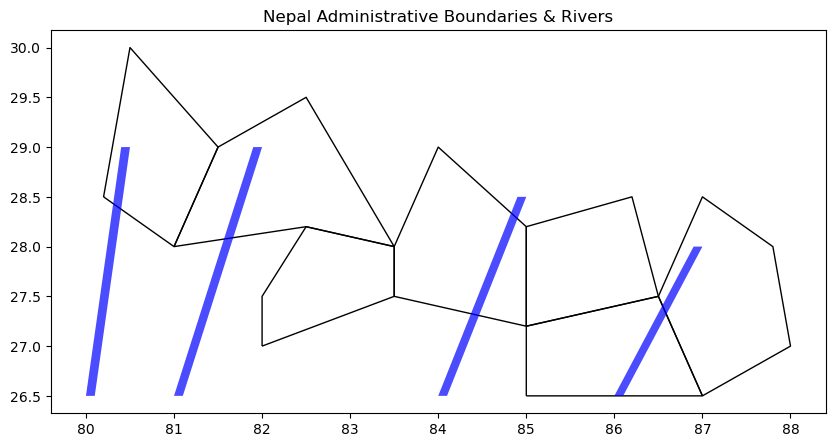

In [6]:
#Plot Nepal's Administrative Boundaries with Rivers

fig, ax = plt.subplots(figsize=(10, 6))
nepal_admin.plot(ax=ax, edgecolor="black", facecolor="none", linewidth=1)
nepal_rivers.plot(ax=ax, color="blue", linewidth=0.5, alpha=0.7)
plt.title("Nepal Administrative Boundaries & Rivers")
plt.show()

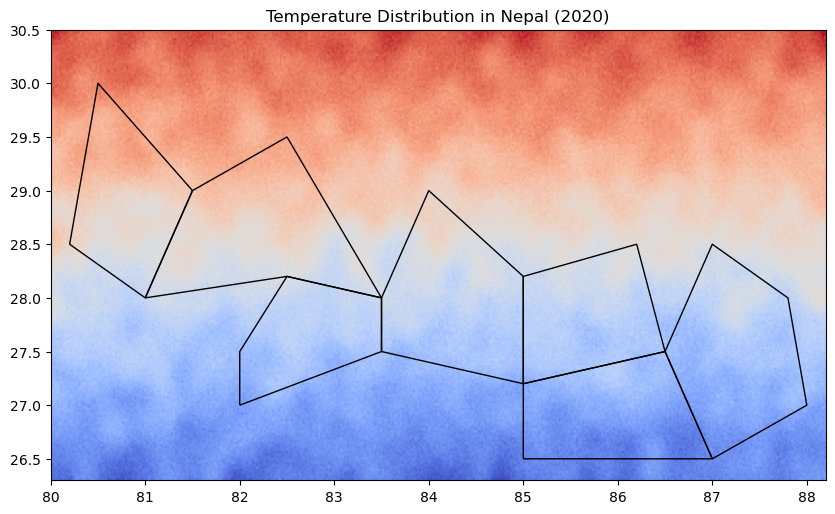

In [7]:
#Visualize Temperature Data

fig, ax = plt.subplots(figsize=(10, 6))
show(temp_2020, transform=temp_transform, cmap="coolwarm", ax=ax)
nepal_admin.plot(ax=ax, edgecolor="black", facecolor="none", linewidth=1)
plt.title("Temperature Distribution in Nepal (2020)")
plt.show()

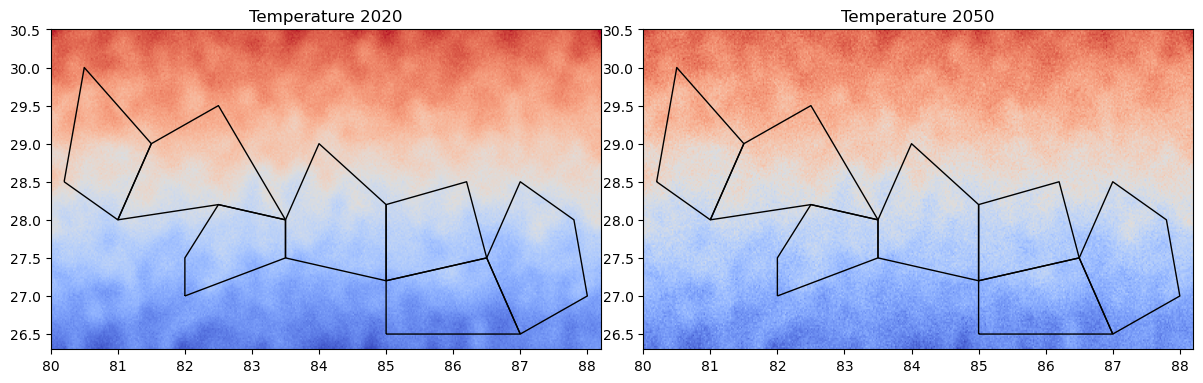

In [8]:
#Compare Temperature Changes (2020 vs. 2050)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# 2020 Temperature
show(temp_2020, transform=temp_transform, cmap="coolwarm", ax=axes[0])
nepal_admin.plot(ax=axes[0], edgecolor="black", facecolor="none", linewidth=1)
axes[0].set_title("Temperature 2020")

# 2050 Temperature
show(temp_2050, transform=temp_transform, cmap="coolwarm", ax=axes[1])
nepal_admin.plot(ax=axes[1], edgecolor="black", facecolor="none", linewidth=1)
axes[1].set_title("Temperature 2050")

plt.tight_layout()
plt.show()

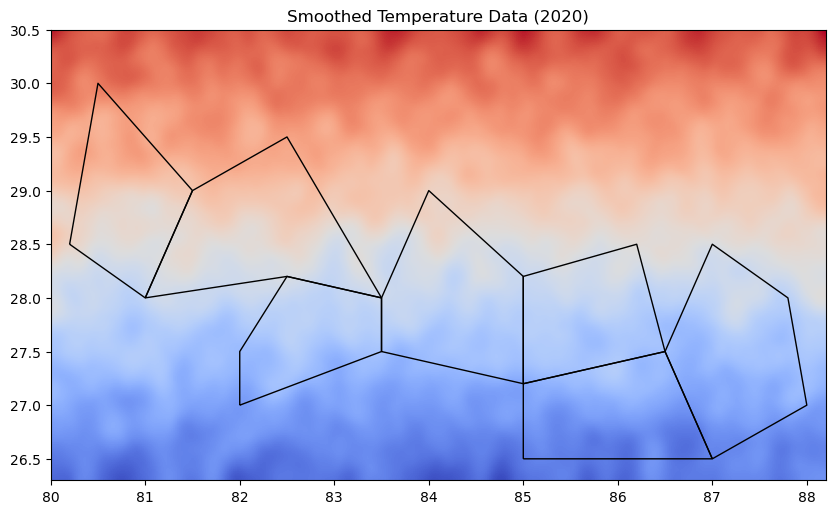

In [9]:
#Apply Gaussian Smoothing to Climate Data

smoothed_temp = gaussian_filter(temp_2020, sigma=2)
fig, ax = plt.subplots(figsize=(10, 6))
show(smoothed_temp, transform=temp_transform, cmap="coolwarm", ax=ax)
nepal_admin.plot(ax=ax, edgecolor="black", facecolor="none", linewidth=1)
plt.title("Smoothed Temperature Data (2020)")
plt.show()

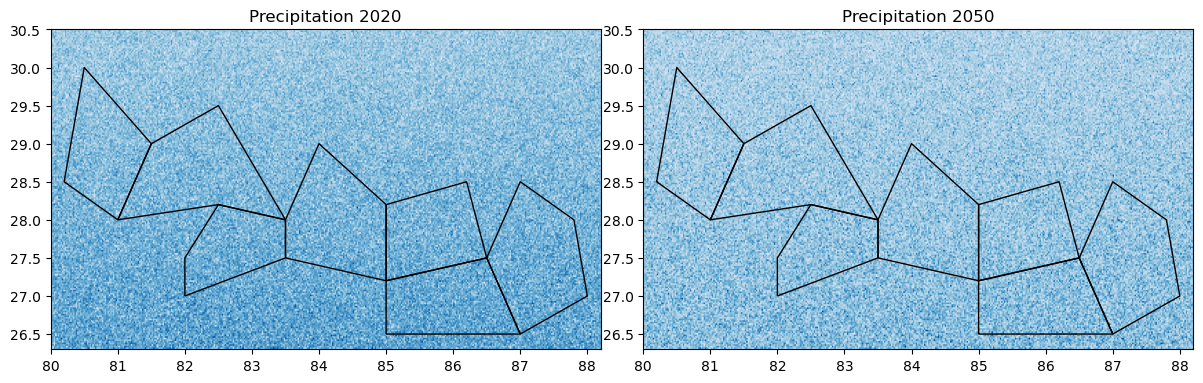

In [10]:
#Plot Precipitation Data (2020 & 2050)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# 2020 Precipitation
show(precip_2020, transform=precip_transform, cmap="Blues", ax=axes[0])
nepal_admin.plot(ax=axes[0], edgecolor="black", facecolor="none", linewidth=1)
axes[0].set_title("Precipitation 2020")

# 2050 Precipitation
show(precip_2050, transform=precip_transform, cmap="Blues", ax=axes[1])
nepal_admin.plot(ax=axes[1], edgecolor="black", facecolor="none", linewidth=1)
axes[1].set_title("Precipitation 2050")

plt.tight_layout()
plt.show()

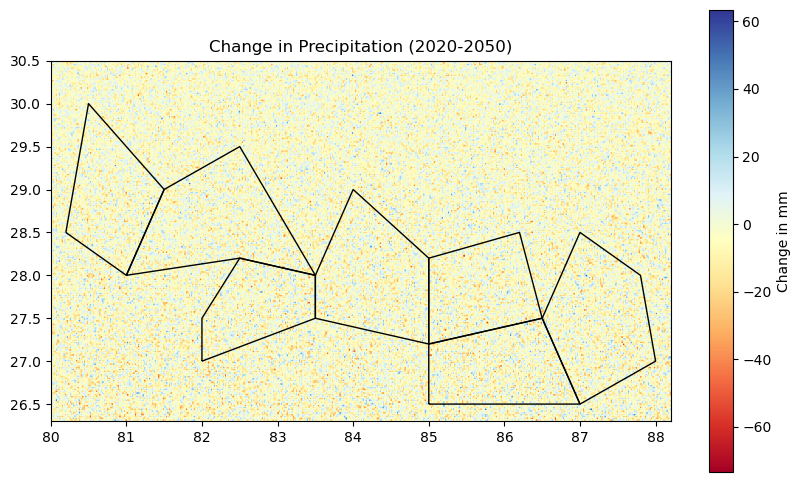

In [11]:
#Compute Precipitation Change

precip_change = precip_2050 - precip_2020  # Change in precipitation
fig, ax = plt.subplots(figsize=(10, 6))
show(precip_change, transform=precip_transform, cmap="RdYlBu", ax=ax)
nepal_admin.plot(ax=ax, edgecolor="black", facecolor="none", linewidth=1)
plt.title("Change in Precipitation (2020-2050)")
plt.colorbar(ax.images[0], label="Change in mm")
plt.show()

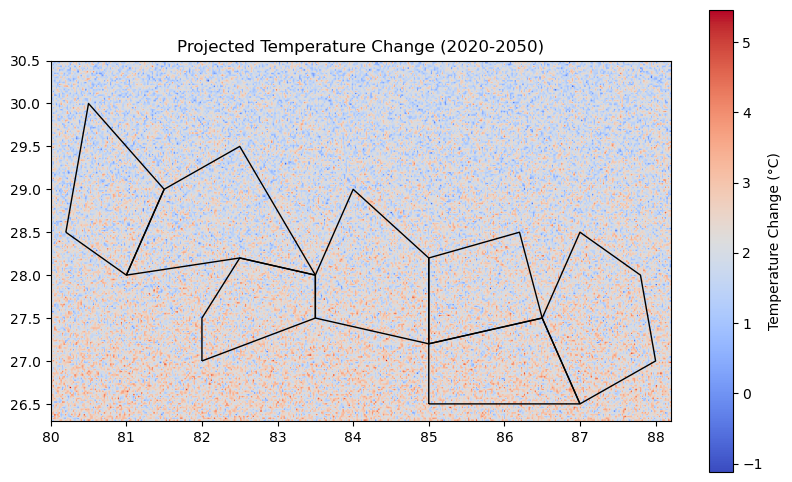

In [12]:
#Compute Temperature Change

temp_change = temp_2050 - temp_2020  # Increase in temperature

fig, ax = plt.subplots(figsize=(10, 6))
show(temp_change, transform=temp_transform, cmap="coolwarm", ax=ax)
nepal_admin.plot(ax=ax, edgecolor="black", facecolor="none", linewidth=1)
plt.title("Projected Temperature Change (2020-2050)")
plt.colorbar(ax.images[0], label="Temperature Change (°C)")
plt.show()

In [13]:
#Compute Average Temperature Increase

avg_temp_increase = np.nanmean(temp_change)  # Ignore NaNs
print(f"Average Temperature Increase (2020-2050): {avg_temp_increase:.2f}°C")

Average Temperature Increase (2020-2050): 2.10°C


In [14]:
#Interactive Maps using folium

#Create a Base Map

import folium

# Define Nepal's center coordinates (approximate)
nepal_center = [28.3949, 84.1240]  
m = folium.Map(location=nepal_center, zoom_start=6)

# Add administrative boundaries
folium.GeoJson(nepal_admin, name="Nepal Admin Boundaries").add_to(m)

# Show the map
m

In [15]:
#Add Temperature Change as a Heatmap

from folium.plugins import HeatMap

# Convert raster to list of (lat, lon, value)
temp_change_points = []
for row in range(temp_change.shape[0]):
    for col in range(temp_change.shape[1]):
        value = temp_change[row, col]
        if not np.isnan(value):  # Ignore NaNs
            lon, lat = temp_transform * (col, row)
            temp_change_points.append([lat, lon, value])

# Add heatmap layer
HeatMap(temp_change_points, radius=15, name="Temperature Change").add_to(m)

# Show map
m

In [16]:
#Statistical Analysis

#Compute Statistics
# Temperature statistics
temp_2020_mean = np.nanmean(temp_2020)
temp_2050_mean = np.nanmean(temp_2050)
temp_variance = np.nanvar(temp_2020)
temp_max = np.nanmax(temp_2050) - np.nanmax(temp_2020)

# Precipitation statistics
precip_2020_mean = np.nanmean(precip_2020)
precip_2050_mean = np.nanmean(precip_2050)
precip_variance = np.nanvar(precip_2020)
precip_max = np.nanmax(precip_2050) - np.nanmax(precip_2020)

print(f"Temperature 2020 Mean: {temp_2020_mean:.2f}°C")
print(f"Temperature 2050 Mean: {temp_2050_mean:.2f}°C")
print(f"Temperature Variance: {temp_variance:.2f}")
print(f"Maximum Temperature Increase: {temp_max:.2f}°C\n")

print(f"Precipitation 2020 Mean: {precip_2020_mean:.2f} mm")
print(f"Precipitation 2050 Mean: {precip_2050_mean:.2f} mm")
print(f"Precipitation Variance: {precip_variance:.2f}")
print(f"Maximum Precipitation Change: {precip_max:.2f} mm")

Temperature 2020 Mean: -7.58°C
Temperature 2050 Mean: -5.47°C
Temperature Variance: 53.22
Maximum Temperature Increase: 3.33°C

Precipitation 2020 Mean: 50.84 mm
Precipitation 2050 Mean: 48.29 mm
Precipitation Variance: 129.79
Maximum Precipitation Change: 32.14 mm


In [24]:
import os

# Check if the directory exists, if not, create it
output_dir = "nepal_climate_data_report"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print(f"Directory {output_dir} created successfully.")
else:
    print(f"Directory {output_dir} already exists.")


Directory nepal_climate_data_report created successfully.


In [25]:
import rasterio
from rasterio.transform import from_origin

def save_raster(data, filename, description):
    """
    Save a list of 2D arrays (monthly temperature data) as a multi-band GeoTIFF.
    
    :param data: List of 2D arrays (each representing temperature data for a month)
    :param filename: Path where the GeoTIFF will be saved
    :param description: Description of the dataset (e.g., "Baseline Temperature (2020)")
    """
    # Assuming the data is a list of 12 monthly arrays
    height, width = data[0].shape  # Get the shape from the first month
    transform = from_origin(85.5, 30, 0.1, 0.1)  # Example: top-left corner and pixel size
    
    # Open the GeoTIFF file for writing
    with rasterio.open(filename, 'w', driver='GTiff', 
                       count=12, width=width, height=height, 
                       dtype='float32', crs='EPSG:4326', 
                       transform=transform) as dst:
        for i, month_data in enumerate(data):
            dst.write(month_data, i + 1)  # Write each month's data as a separate band
            dst.set_band_description(i + 1, f"Month {i + 1}: {description}")


In [27]:
# Generate synthetic data for 2020 (baseline) and 2050 (projected)
# Import the function from your Python script
from nepal_climate_synthetic_data import create_temperature_data

# Use the function to generate synthetic temperature data
baseline_temp, projected_temp = create_temperature_data()

# Check the output
print("Baseline Temperature Data for 2020:", baseline_temp)
print("Projected Temperature Data for 2050:", projected_temp)

baseline_temp, projected_temp = create_temperature_data()

# Save the baseline (2020) and projected (2050) temperature data as GeoTIFF files
save_raster(baseline_temp, "nepal_climate_data_report/nepal_temperature_2020.tif", "Baseline Temperature (2020)")
save_raster(projected_temp, "nepal_climate_data_report/nepal_temperature_2050.tif", "Projected Temperature (2050)")


Baseline Temperature Data for 2020: [array([[  3.84418863,   2.28625421,   2.85527298, ...,   6.5352088 ,
          5.7247007 ,   6.04427057],
       [  2.03992683,   3.47166213,   4.16837031, ...,   5.74230343,
          6.689069  ,   5.14292751],
       [  3.34969069,   3.15756944,   3.27353521, ...,   5.93037181,
          5.075013  ,   5.54208493],
       ...,
       [-20.07025464, -20.07085627, -20.10913818, ..., -22.88622021,
        -21.85653186, -22.45135394],
       [-20.12606231, -20.08945079, -21.04420613, ..., -22.26925039,
        -23.19545125, -22.54283744],
       [-21.50386466, -21.11456875, -20.27217294, ..., -22.73405734,
        -21.53902696, -21.99090013]]), array([[  7.90367867,   7.2088026 ,   7.15519992, ...,  10.01372653,
         10.40109555,   9.69141393],
       [  7.03572723,   7.37192643,   6.88422843, ...,   9.87584366,
          9.77859182,   9.73342849],
       [  7.34142117,   7.89617867,   7.26337435, ...,   9.33327372,
         10.08857277,   9.795884

In [28]:
from nepal_climate_synthetic_data import create_precipitation_data

# Generate synthetic data for 2020 (baseline) and 2050 (projected)
baseline_precip, projected_precip = create_precipitation_data()

# Check the output
print("Baseline Precipitation Data for 2020:", baseline_precip)
print("Projected Precipitation Data for 2050:", projected_precip)

# Save the baseline (2020) and projected (2050) precipitation data as GeoTIFF files
save_raster(baseline_precip, "nepal_climate_data_report/nepal_precipitation_2020.tif", "Baseline Precipitation (2020)")
save_raster(projected_precip, "nepal_climate_data_report/nepal_precipitation_2050.tif", "Projected Precipitation (2050)")


Baseline Precipitation Data for 2020: [array([[34.67503308, 35.64445747, 38.8862596 , ..., 34.21301089,
        41.32154732, 41.33234705],
       [36.41844956, 34.71310441, 33.30907735, ..., 40.62710648,
        35.59196845, 47.89867268],
       [52.70952043, 39.09234959, 33.42019865, ..., 31.60380942,
        41.07793456, 41.80673053],
       ...,
       [62.95526942, 59.96886984, 65.03601283, ..., 59.25230819,
        60.5747794 , 63.23142224],
       [74.74426318, 62.9956223 , 58.23806638, ..., 48.63240261,
        62.03328397, 68.21268205],
       [50.67024912, 70.26069414, 54.2145623 , ..., 49.49648083,
        46.42556631, 54.42282886]]), array([[ 41.69133052,  55.55562399,  86.3635616 , ...,  67.80313524,
         44.76867582,  72.03432901],
       [ 67.9969014 ,  73.50921962,  82.79753712, ...,  54.44957383,
         70.7652713 ,  57.49602343],
       [ 65.75370043,  58.0936812 ,  65.09022573, ...,  42.92618343,
         50.20939881,  87.43734623],
       ...,
       [ 73.12275

In [29]:
# Assuming baseline_temp and projected_temp are lists of monthly temperature data
save_raster(baseline_temp, "nepal_climate_data_report/nepal_temperature_2020.tif", "Baseline Temperature (2020)")
save_raster(projected_temp, "nepal_climate_data_report/nepal_temperature_2050.tif", "Projected Temperature (2050)")

# Similarly, for precipitation data
save_raster(baseline_precip, "nepal_climate_data_report/nepal_precipitation_2020.tif", "Baseline Precipitation (2020)")
save_raster(projected_precip, "nepal_climate_data_report/nepal_precipitation_2050.tif", "Projected Precipitation (2050)")


In [39]:
import json
import nbformat
from datetime import datetime
import os

# Define the correct notebook path
notebook_path = os.path.join(os.getcwd(), "climate_change_data.ipynb")


# Check if the notebook file exists
if not os.path.exists(notebook_path):
    raise FileNotFoundError(f"Notebook file not found: {notebook_path}")

# Load the notebook file
with open(notebook_path, "r", encoding="utf-8") as f:
    notebook = nbformat.read(f, as_version=4)

# Define spatial bounds for Nepal
nepal_bounds = {
    "min_lon": 80.058,
    "min_lat": 26.347,
    "max_lon": 88.201,
    "max_lat": 30.447
}

x_res = 0.05  # Example resolution

# Create metadata dictionary
metadata = {
    "title": "Nepal Climate Change Synthetic Dataset",
    "description": "Synthetic climate data for Nepal showing baseline (2020) and projected (2050) conditions",
    "created_date": datetime.now().strftime("%Y-%m-%d"),
    "spatial_coverage": f"Nepal ({nepal_bounds['min_lon']}, {nepal_bounds['min_lat']}) to ({nepal_bounds['max_lon']}, {nepal_bounds['max_lat']})",
    "temporal_coverage": "2020 (baseline) and 2050 (projection)",
    "raster_resolution": f"{x_res:.4f} degrees (~{x_res * 111}km at equator)",
    "projection": "EPSG:4326 (WGS84)",
    "scenario": "Synthetic data approximating RCP4.5-like scenario",
    "variables": {
        "temperature": "Monthly average temperature in degrees Celsius",
        "precipitation": "Monthly total precipitation in millimeters",
        "admin_regions": "Administrative regions with climate vulnerability index",
        "rivers": "Major river systems with projected flow changes",
        "glaciers": "Glacier monitoring points with retreat rates"
    },
    "notes": "This is synthetic data for demonstration purposes. It should not be used for actual climate research or planning."
}

# Define output directory
output_dir = "nepal_climate_data_report"
os.makedirs(output_dir, exist_ok=True)

# Define metadata file path
metadata_path = os.path.join(output_dir, "metadata.json")

# Save metadata as JSON
with open(metadata_path, "w") as f:
    json.dump(metadata, f, indent=2)

# Print confirmation
print(f"Metadata saved successfully at: {metadata_path}")


FileNotFoundError: Notebook file not found: d:\AI\assignment\sixth\gis-data-science-assignment-pikuz4m31\GIS_Data_Science\GIS_Data_Science/climate_change_data.ipynb

**Climate Data Analysis for Nepal**

## **Objective**
This assignment aims to explore and analyze climate data for Nepal using Python. The primary objectives are:

- Load and preprocess climate and geographic data for Nepal.
- Conduct exploratory data analysis (EDA) to identify trends and patterns.
- Generate visualizations to better understand climate-related variations.
- Summarize key insights from the data analysis.

## **Environment Setup & Execution**
### **Requirements**
Ensure you have the following Python libraries installed:
- `numpy`
- `pandas`
- `geopandas`
- `rasterio`
- `matplotlib`
- `shapely`
- `scipy`

### **Installation**
Use the following command to install the required dependencies:
```bash
pip install numpy pandas geopandas rasterio matplotlib shapely scipy
```

### **Running the Notebook**
1. Download the dataset and place it in the appropriate directory (`nepal_climate_data`).
2. Open the Jupyter Notebook environment.
3. Load and execute each cell sequentially to ensure proper data processing.

## **Data Sources & Preprocessing**
The notebook loads various geographic and climate datasets:
- **Nepal Administrative Regions**: GIS data representing Nepal’s administrative boundaries.
- **Nepal Rivers**: GIS shapefile mapping major rivers.
- **Nepal Glaciers**: Geospatial data representing glacier locations.
- **Local Administrative Units**: Local-level administrative boundaries.

**Preprocessing Steps:**
- Loading datasets using `geopandas.read_file()`.
- Inspecting and cleaning data, including handling missing values.
- Applying spatial transformations and projections if necessary.

## **Visualizations & Insights**
The notebook generates multiple visualizations, including:

### **1. Administrative Boundaries Map**
- Displays Nepal’s administrative regions for spatial reference.
- Helps in overlaying climate data on defined boundaries.

### **2. River & Glacier Distribution**
- Maps Nepal’s river networks and glacier locations.
- Highlights the distribution of water resources.

### **3. Climate Trends Over Time**
- Uses line plots and heatmaps to showcase temperature and precipitation variations.
- Provides insights into climate change trends across different regions.

### **4. Smoothed Climate Data**
- Gaussian filters are applied to visualize trends more clearly.
- Reduces noise in climate variables for better pattern recognition.

## **Findings from Exploratory Data Analysis (EDA)**
- Nepal exhibits significant regional variations in climate conditions.
- Glacial regions are susceptible to temperature increases, indicating possible impacts of climate change.
- River distributions align with major topographical features, affecting hydrology and water availability.
- Spatial visualizations help in identifying critical regions affected by climate anomalies.

## **Conclusion**
This analysis provides a comprehensive understanding of Nepal’s climate data through GIS-based exploration and statistical analysis. The findings can be useful for policymakers, researchers, and environmentalists in assessing climate-related risks and planning sustainable interventions.